In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option("display.max_columns", None)

In [3]:
sns.set_style("whitegrid")

In [40]:
df = pd.read_csv("german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
df["Risk"].value_counts()

Risk
good    700
bad     300
Name: count, dtype: int64

In [7]:
df.shape

(1000, 11)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [9]:
df["Job"].unique()

array([2, 1, 3, 0])

In [10]:
df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(0)

In [41]:
df = df.dropna().reset_index(drop=True)

In [14]:
df

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,4,53,male,2,free,little,little,4870,24,car,bad
3,7,35,male,3,rent,little,moderate,6948,36,car,good
4,9,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
517,989,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,993,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,996,40,male,3,own,little,little,3857,30,car,good
520,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [15]:
df.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [42]:
df.drop(columns= 'Unnamed: 0' , inplace= True)

In [18]:
df

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,22,female,2,own,little,moderate,5951,48,radio/TV,bad
1,45,male,2,free,little,little,7882,42,furniture/equipment,good
2,53,male,2,free,little,little,4870,24,car,bad
3,35,male,3,rent,little,moderate,6948,36,car,good
4,28,male,3,own,little,moderate,5234,30,car,bad
...,...,...,...,...,...,...,...,...,...,...
517,48,male,1,own,little,moderate,1743,24,radio/TV,good
518,30,male,3,own,little,little,3959,36,furniture/equipment,good
519,40,male,3,own,little,little,3857,30,car,good
520,23,male,2,free,little,little,1845,45,radio/TV,bad


In [19]:
df.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='str')

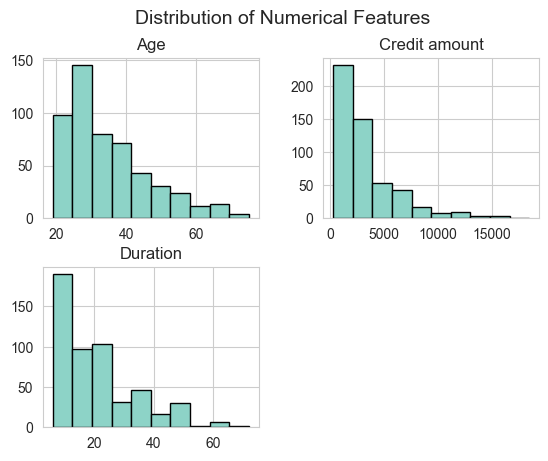

In [26]:
df[["Age", "Credit amount", "Duration"]].hist(bins = 10, edgecolor = "black")
plt.suptitle("Distribution of Numerical Features", fontsize = 14)
plt.show()

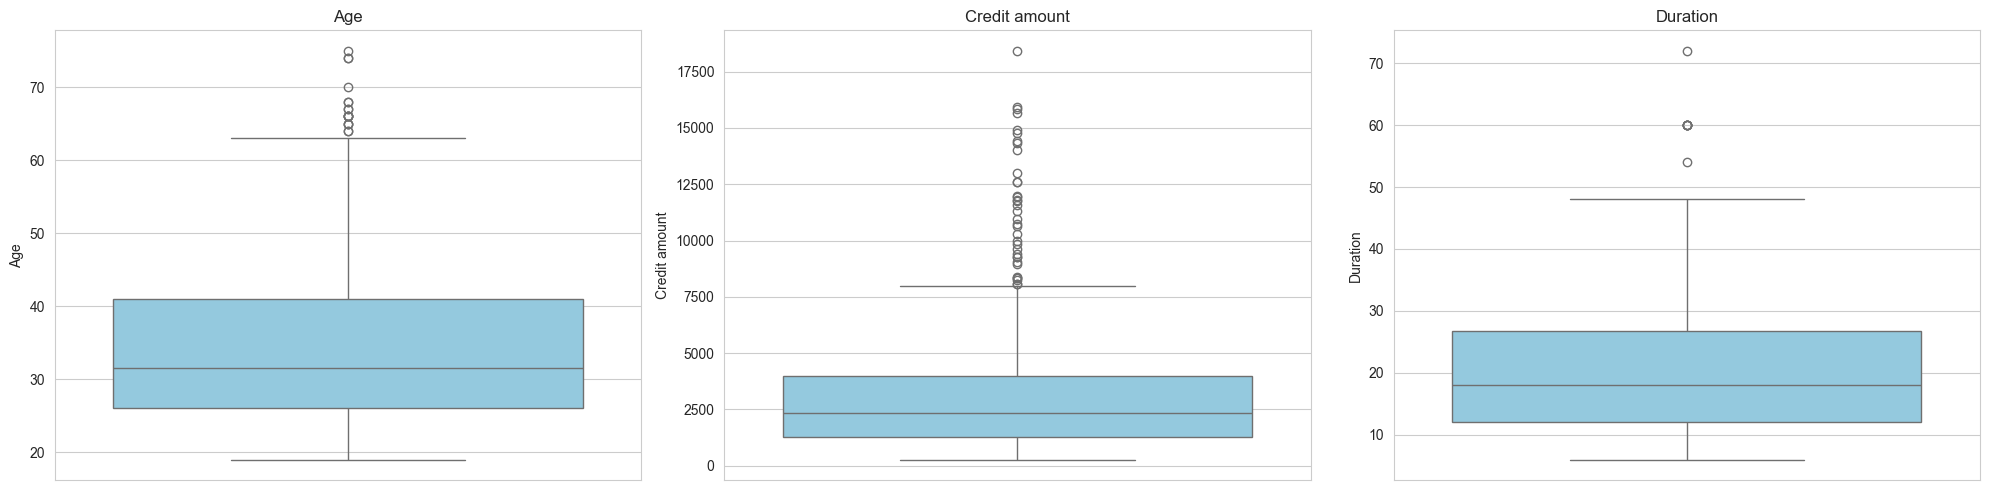

In [27]:
plt.figure(figsize=(20,5))
for i, col in enumerate(["Age","Credit amount","Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [28]:
df.query("Duration >= 60")

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [29]:
categorical_cols = ["Sex","Job","Housing", "Saving accounts", "Checking account", "Purpose"]

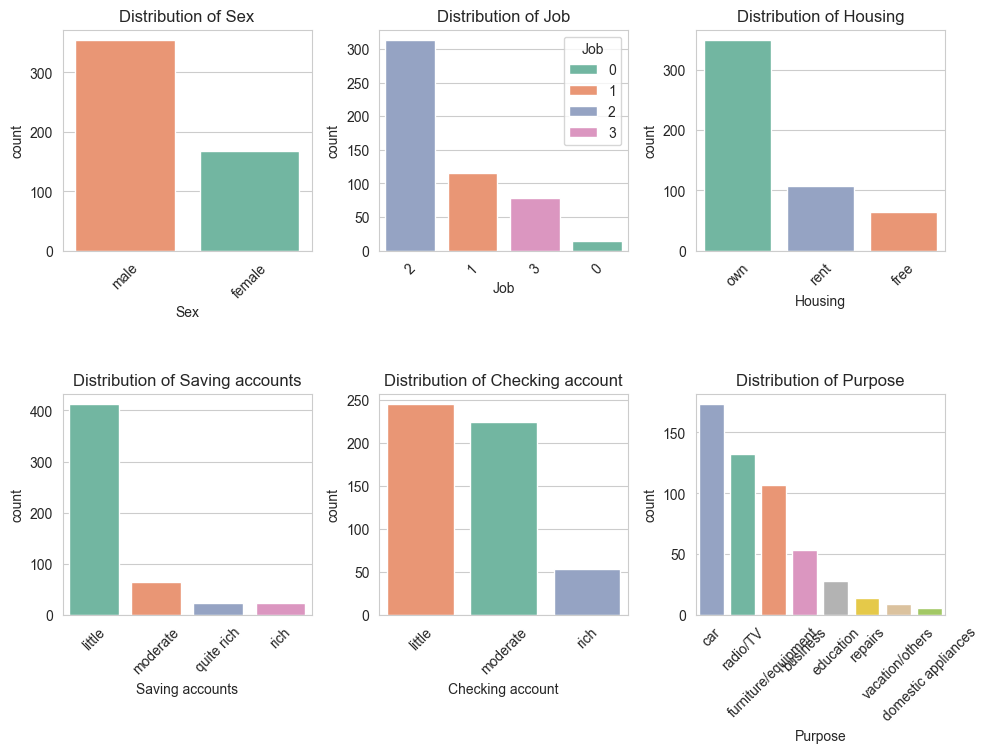

In [34]:
plt.figure(figsize= (10,10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3,3,i+1)
    sns.countplot(data= df, x = col,hue= col, palette = "Set2", order = df[col].value_counts().index)
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
corr = df[["Age", "Job", "Credit amount" ,"Duration"]].corr()

In [36]:
corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


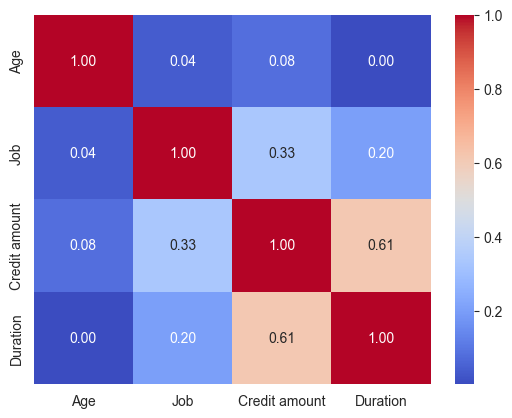

In [37]:
sns.heatmap(corr, annot= True, cmap = "coolwarm", fmt= ".2f")
plt.show()

In [38]:
df.groupby("Job") ["Credit amount"].mean()

Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [39]:
df.groupby("Sex") ["Credit amount"].mean()

Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [40]:
pd.pivot_table(df, values= "Credit amount", index = "Housing", columns = "Purpose")

Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


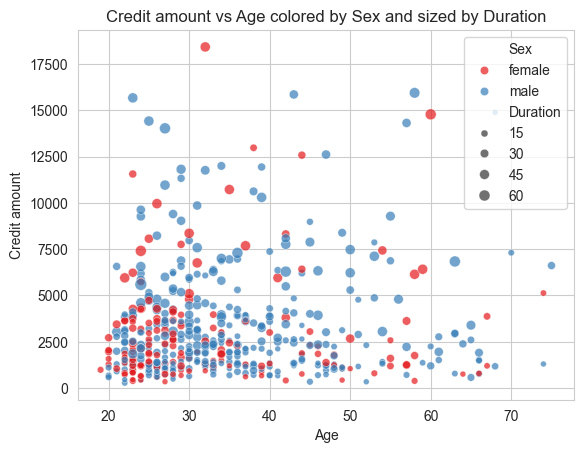

In [41]:
sns.scatterplot(data = df, x= "Age", y="Credit amount", hue = "Sex", size = "Duration", alpha= 0.7, palette="Set1")
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()

C:\Users\Karthick\AppData\Local\Temp\ipykernel_12476\1326617463.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data = df, x= "Saving accounts", y = "Credit amount", palette ="Pastel1")


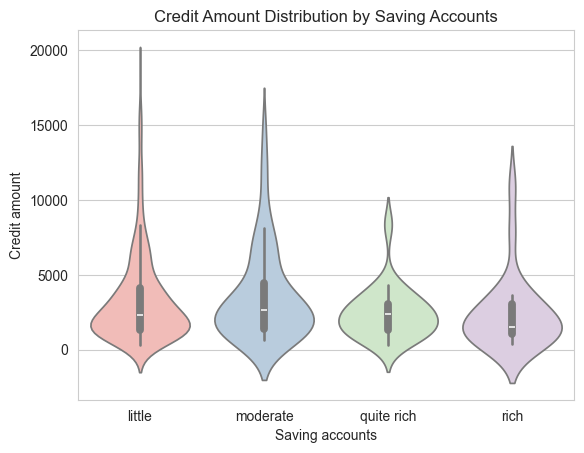

In [42]:
sns.violinplot(data = df, x= "Saving accounts", y = "Credit amount", palette ="Pastel1")
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()

In [43]:
df ["Risk"].value_counts (normalize= True) * 100

Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

C:\Users\Karthick\AppData\Local\Temp\ipykernel_12476\2001287140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")
C:\Users\Karthick\AppData\Local\Temp\ipykernel_12476\2001287140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")
C:\Users\Karthick\AppData\Local\Temp\ipykernel_12476\2001287140.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")


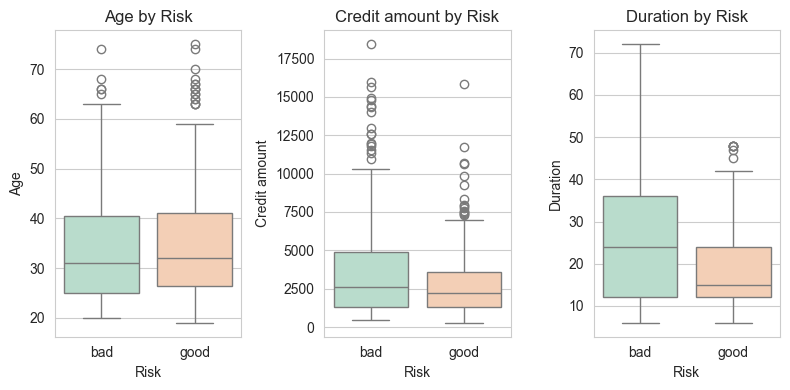

In [49]:
plt.figure(figsize= (8,4))
for i, col in enumerate (["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3, i+1)
    sns.boxplot(data = df, x = "Risk", y=col, palette="Pastel2")
    plt.title(f"{col} by Risk")
plt.tight_layout()
plt.show()

In [50]:
df.groupby("Risk") [["Age", "Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


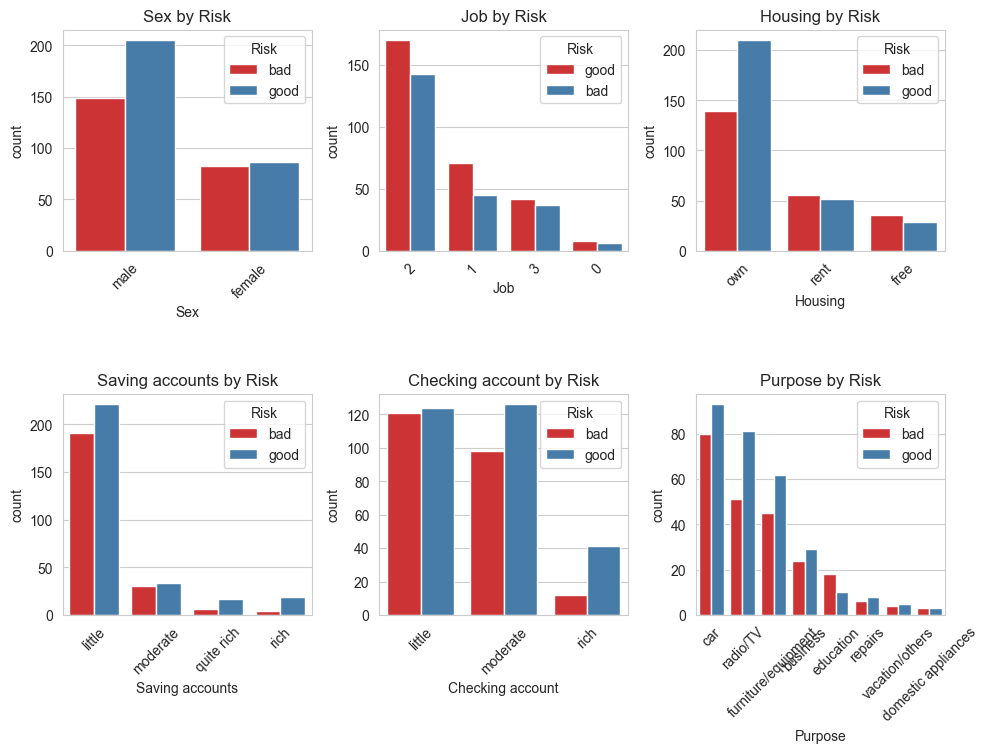

In [55]:
plt.figure(figsize= (10,10))
for i, col in enumerate (categorical_cols):
    plt.subplot(3, 3, i+ 1)
    sns.countplot(data = df, x=col, hue = "Risk", palette = "Set1", order = df[col].value_counts().index)
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [43]:
features = ["Age", "Sex", "Job", "Housing", "Saving accounts", "Checking account", "Credit amount"]

In [44]:
target = "Risk"

In [45]:
df_model = df [features + [target]].copy()

In [59]:
df_model.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Risk
0,22,female,2,own,little,moderate,5951,bad
1,45,male,2,free,little,little,7882,good
2,53,male,2,free,little,little,4870,bad
3,35,male,3,rent,little,moderate,6948,good
4,28,male,3,own,little,moderate,5234,bad


In [46]:
from sklearn.preprocessing import LabelEncoder
import joblib

In [47]:
cat_cols = df_model.select_dtypes(include=["object", "string"]).columns.drop("Risk")

In [48]:
le_dict= {}

In [49]:
for col in cat_cols:
    le = LabelEncoder()
    df_model [col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")

In [59]:
le_target = LabelEncoder()

In [60]:
df_model[target] = le_target.fit_transform(df_model[target])

In [61]:
joblib.dump(le_target, "target_encoder.pkl")

['target_encoder.pkl']

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = df_model.drop(target, axis = 1 )

In [52]:
y = df_model[target]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 1)

In [73]:
X_train.shape

(417, 7)

In [74]:
X_test.shape

(105, 7)

In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [55]:
def train_model(model, param_grid, X_train, y_train, X_test, y_test):

    grid = GridSearchCV(model, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_   # <-- THIS WAS MISSING

    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    return best_model, acc, grid.best_params_

In [85]:
dt= DecisionTreeClassifier(random_state = 1, class_weight = "balanced")
dt_param_grid = {
    "max_depth" : [3,5,7,None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf" : [1,2,4]
}


In [86]:
best_dt, acc_dt, params_dt = train_model(dt, dt_param_grid, X_train, y_train, X_test, y_test)

In [87]:
print("Decision Tree Accuracy", acc_dt)

Decision Tree Accuracy 0.6857142857142857


In [88]:
print("Best parameters", params_dt)

Best parameters {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [93]:
rf = RandomForestClassifier(random_state = 1, class_weight = "balanced", n_jobs = -1)

In [94]:
rf_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [ 5, 7, 10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [95]:
best_rf, acc_rf, params_rf = train_model(rf, rf_param_grid,X_train, y_train, X_test, y_test)

In [96]:
print("Random Forest Accuracy", acc_rf)

Random Forest Accuracy 0.638095238095238


In [97]:
print("Best params", params_rf)

Best params {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


In [56]:
et = ExtraTreesClassifier(random_state= 1,class_weight = "balanced",n_jobs = -1)

In [57]:
et_param_grid = {
    "n_estimators": [100,200],
    "max_depth": [ 5, 7, 10, None],
    "min_samples_split" : [2,5,10],
    "min_samples_leaf": [1,2,4]
}

In [58]:
best_et, acc_et, params_et = train_model(et, et_param_grid,X_train, y_train, X_test, y_test)

In [101]:
print("Extra trees accuracy: ", acc_et)

Extra trees accuracy:  0.580952380952381


In [103]:
print("Best params:", params_et)

Best params: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [108]:
xgb = XGBClassifier(random_state = 1, scale_pos_weight = (y_train ==0).sum()/(y_train ==1).sum(), eval_metric = "logloss")

In [109]:
xgb_param_grid = {
    "n_estimators": [100, 2001],
    "max_depth": [3,5,7],
    "learning_rate" : [0.01, 0.1, 0.2],
    "subsample" : [0.7, 1],
    "colsample_bytree" : [0.7, 1]
}

In [110]:
best_xgb, acc_xgb, params_xgb = train_model(xgb, xgb_param_grid,X_train, y_train, X_test, y_test)


In [111]:
print("Xgb accuracy:", acc_xgb)

Xgb accuracy: 0.6190476190476191


In [112]:
print("Best params:", params_xgb)

Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1}


In [113]:
best_et.predict(X_test)

array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

In [62]:
joblib.dump(best_et, "extra_trees_credit_model.pkl")

['extra_trees_credit_model.pkl']